In [5]:
import cv2
import pandas as pd
import patchesMethods as pm

In [6]:
def loadDataBase():
    home = True
    
    if home:    
        #Desktop I3
        TRAIN_CSV = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train1090.csv'
        IMAGES_DIR = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train\images'
        MASK_DIR = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\masks10-90'
    else:
        # ES00004605
        TRAIN_CSV = r'G:\_phd\dataset\tgs-salt\saltMaskOk.csv'
        IMAGES_DIR= r'G:\_phd\dataset\tgs-salt\train\images' 
        MASK_DIR = r'G:\_phd\dataset\tgs-salt\train\masks'

    df_train = pd.read_csv(TRAIN_CSV)
    fileNamesList = df_train.iloc[0:100,0]
    imagesList = pm.loadImages(IMAGES_DIR, fileNamesList)
    masksList  = pm.loadImages(MASK_DIR,  fileNamesList)
    patchesDB = pm.buildPatchesDB(masksList, imagesList)
    return patchesDB

In [7]:
patchesDB = loadDataBase()    
img = pm.searchNearestKey(patchesDB, 75)


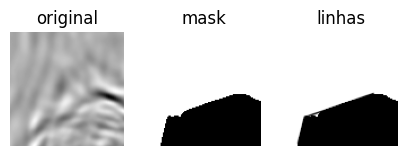

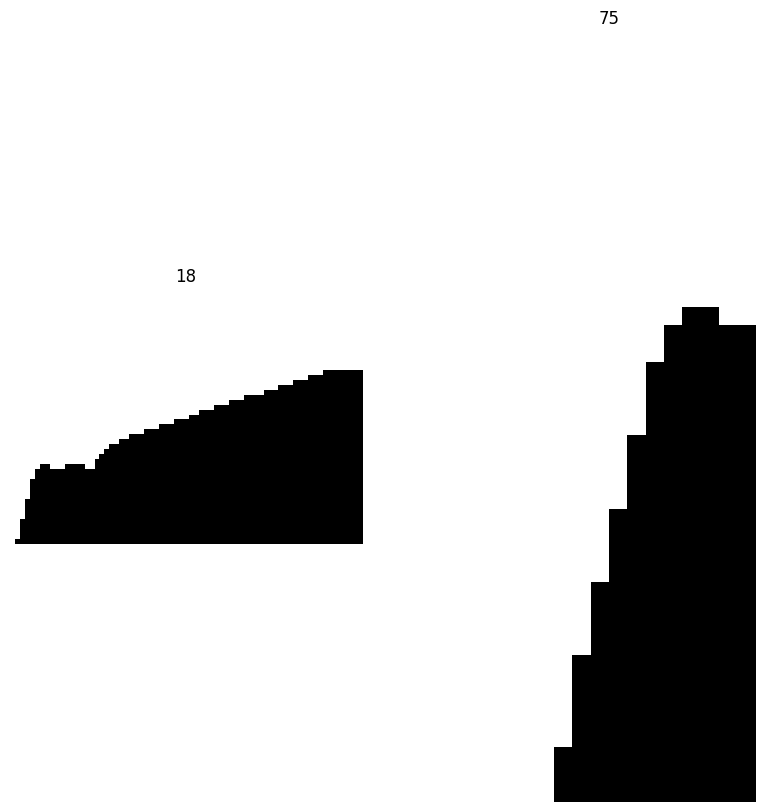

In [10]:
sample_path="../tgs_salt/0bdd44d530.png"
mask_path  ="../tgs_salt/0bdd44d530Mask.png"

original = cv2.imread(sample_path)
mask = cv2.imread(mask_path,0)
patches, linesImage = pm.probHough(mask, mask, tresh = 20, minPoints=15, maxGap=10, sort=False)

pm.showImages([original, mask, linesImage],['original','mask','linhas'] )
pm.dispPatchesClass(patches)

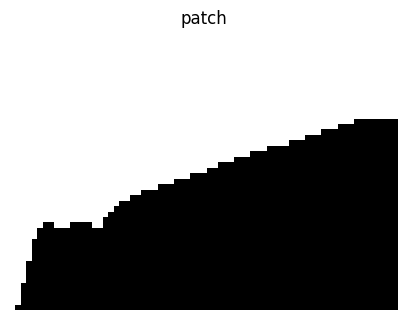

In [9]:
dilated_edge, zone0, zone1, fullmask = pm.create_Masks(mask)
generat_mask = dilated_edge

if patches is not None:
    p = patches[0]
    origRGBSample = pm.searchNearestKey(patchesDB, p.angle)
    x1,y1,x2,y2 = p.line
    #set 0 to generat_mask columns from y1 to y2
    patchMask = generat_mask.copy()

if x1 < x2:
    patchMask[:,0:x1] = 0
    patchMask[:,x2:] = 0
else:
    patchMask[:,0:x2] = 0
    patchMask[:,x1:] = 0
    
imagesList = [p.image, generat_mask, patchMask]
titlesList = ['patch', 'generat_mask', 'patchMask']

pm.showImages( imagesList, titlesList)